In [1]:
# Import required libraries for data handling, visualization, and suppressing warnings

import pandas as pd              # pandas is used for data manipulation, cleaning, and analysis
import numpy as np               # numpy provides efficient numerical operations
import seaborn as sns            # seaborn is used for statistical and attractive visualizations
import matplotlib.pyplot as plt  # matplotlib is used to create graphs and plots
from pandas import NA            # NA represents missing values in pandas (more consistent with nullable dtypes)
from collections import Counter  # Counter helps count the frequency of items (e.g., for mode calculations)
from IPython.display import display  # display() shows DataFrames cleanly in notebooks
import warnings                  # warnings lets us control or hide warning messages
import glob                      # glob allows searching for files using wildcard patterns

# Ignore all warnings to keep the notebook output clean and readable
warnings.filterwarnings('ignore')

# Load the first dataset into df1.
# The encoding 'ISO-8859-1' is used to safely read special characters that may cause issues under UTF-8.
# low_memory=False prevents pandas from incorrectly inferring mixed data types while loading.
df1 = pd.read_csv('Dataset1.csv', encoding='ISO-8859-1', low_memory=False)

# Load the second dataset into df2 using the same options to ensure consistency.
df2 = pd.read_csv('Dataset2.csv', encoding='ISO-8859-1', low_memory=False)

# Concatenate df1 and df2 into one combined DataFrame called df.
# The datasets are stacked vertically (row-wise).
# ignore_index=True resets the index so rows are uniquely numbered.
df = pd.concat([df1, df2], ignore_index=True)

# Remove rows where all values are missing (completely empty rows).
# These often appear due to file formatting or export issues.
df.dropna(how='all', inplace=True)


In [2]:
df.head()  # Display the first 5 rows of the DataFrame to preview its structure and content

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,value_sales,value_cost,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,customer_order_number,dss_update_time
0,NaN,101.0,411800601,NaN,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,Trade,...,655.20,252.0,252.0,0.0,AUD,NaN,2217887.0,1.0,2865354.0,49:58.7
1,20200216.0,101.0,361000403,NaN,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,NaN,...,114.84,36.0,36.0,0.0,AUD,NaN,2185745.0,1.0,2833515.0,49:58.7
2,20230509.0,101.0,361000403,300.0,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,Trade,...,NaN,36.0,36.0,0.0,AUD,NaN,2217807.0,1.0,2864857.0,49:58.7
3,20230518.0,101.0,565540415,500.0,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,Trade,...,60.30,18.0,18.0,0.0,AUD,NaN,2222758.0,1.0,2869759.0,49:58.7
4,20200109.0,101.0,565540415,500.0,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,Trade,...,57.42,18.0,18.0,0.0,AUD,NaN,2170374.0,1.0,2819189.0,49:58.7


In [3]:
# Create a summary DataFrame with information about missing data and data types for each column
summary = pd.DataFrame({
    'Non-Null Count': df.notnull().sum(),  # count of non-null (non-missing) values in each column
    'Null Count': df.isnull().sum(),       # count of null (missing) values in each column
    'Dtype': df.dtypes,                    # data type of each column
    'Missing (%)': df.isnull().mean().round(10) * 100  # percentage of missing values per column, rounded to 10 decimals
})

# Reset the index to make the column names a regular column and rename it to 'Column'
summary = summary.reset_index().rename(columns={'index': 'Column'})

# Display the summary DataFrame
summary


,Column,Non-Null Count,Null Count,Dtype,Missing (%)
0,accounting_date,1089722,4,float64,0.000367
1,company_code,1089707,19,float64,0.001744
2,customer_code,1089717,9,object,0.000826
3,customer_district_code,1089718,8,float64,0.000734
4,item_code,1089721,5,object,0.000459
5,business_area_code,1089721,5,object,0.000459
6,item_group_code,1089720,6,object,0.000551
7,item_class_code,1089713,13,object,0.001193
8,item_type,1089640,86,float64,0.007892
9,bonus_group_code,1089711,15,object,0.001376


### **Observations on Data Structure and Quality**

* **Overall Data Completeness Is Excellent**
  Nearly all columns have an extremely low proportion of missing values (between **0.0001% and 0.007%**). This indicates a high-quality dataset where missingness is unlikely to bias the analysis.

* **One Fully Missing Column**
  The column **`item_source_class`** contains **0 non-null values (100% missing)**.
  It provides no usable information and should be removed during preprocessing.

* **Data Type Inconsistencies: Dates Stored as Floats**
  The **`accounting_date`** field is encoded as `float64`, which is incompatible with time-series operations.
  It must be converted to a proper `datetime` type to enable chronological analysis, period grouping, and recency features.

* **Categorical Variables Incorrectly Stored as Floats**
  Several columns representing identifiers or categorical values (e.g.,
  `company_code`, `customer_district_code`, `item_type`, `invoice_number`)
  are stored as `float64`.
  This usually occurs when nulls force pandas to upcast the column to float.
  These fields should be recast as strings (or categoricals) after cleaning.

* **Large Dataset Volume Supports Row-Level Dropping**
  With approximately **1.09 million** observations per column, the percentage of missing values is negligible.
  Dropping rows with missing data would have **minimal impact on statistical power** and is appropriate for this dataset.



In [4]:
df.describe(include='all').T  # Generate descriptive statistics for all columns, including non-numeric ones, and transpose the result for better readability


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accounting_date,1089722.0,NaN,NaN,NaN,20220430.85962,14142.496222,20200102.0,20210225.0,20220417.0,20230529.0,20241231.0
company_code,1089707.0,NaN,NaN,NaN,221.950984,173.346724,100.0,205.0,205.0,205.0,950.0
customer_code,1089717,4109,234750001,30842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_district_code,1089718.0,NaN,NaN,NaN,376.94086,151.228982,200.0,210.0,400.0,500.0,720.0
item_code,1089721,25113,25550,4604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_area_code,1089721,28,LMP,448943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_group_code,1089720,558,999,102704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_class_code,1089713,199,LMP05,123135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_type,1089640.0,NaN,NaN,NaN,5.876834,1.85127,1.0,5.0,7.0,7.0,9.0
bonus_group_code,1089711,2,Trade,921560,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Financial Anomalies (Crucial for Cleaning)

- **Negative transactional values:** The columns `value_sales`, `value_cost`, and `value_quantity` all have negative minimum values (for example, the minimum of `value_sales` is **−2,295,300**).  
  - **Implication:** These records are likely to represent **returns, credit notes, write-offs, or corrections**, rather than ordinary sales. For sales-performance analysis, they should either be (a) analysed separately as a “Returns / Credits” category, or (b) explicitly flagged so they do not distort averages and trendlines.

- **Sparse price adjustments:** The `value_price_adjustment` column has a mean of **0.02** but a median of **0.0**, with a maximum of **1.0**.  
  - **Implication:** Price adjustments (discounts or surcharges) are **rare and very small** relative to overall transaction values. This feature may have limited predictive power at transaction level, but could still be useful when aggregated (e.g. discount intensity by customer or segment).

---

### 2. Categorical Dominance

- **Market segment is effectively constant:** `market_segment` has only **one unique value** (“Commercial & Industrial”).  
  - **Implication:** This field provides **no variation** and therefore cannot be used as an explanatory variable in regression, classification, or t-tests. It functions more as a dataset-level label than a feature.

- **Currency is concentrated in AUD:** Although `currency` has **5 unique values**, “AUD” appears in approximately **866,884** out of ~1.09 million rows.  
  - **Implication:** The business is overwhelmingly denominated in AUD. For most analyses, it will be reasonable either to **filter to AUD only** or to **convert all currencies to a common AUD baseline** before modelling.

- **Large but skewed salesperson distribution:** `salesperson_code` has **258 unique values**, and the most frequent salesperson (`T300`) appears in **52,270** records.  
  - **Implication:** The salesforce is **large and unevenly distributed**. A small number of salespeople handle a disproportionate share of transactions, which may be relevant for performance benchmarking, territory design, or incentive analysis.

---

### 3. Data Structure Issues (Numeric vs Categorical)

- **Identifiers stored as numeric:** Fields such as `customer_district_code`, `item_type`, and `invoice_number` appear with numeric summary statistics (mean, standard deviation, quartiles).  
  - **Implication:** This confirms that they are stored as `float64`, but conceptually these are **identifiers or category codes**, not continuous measures. Aggregating them numerically (e.g. “average invoice number”) is meaningless. They should be recast as **string or categorical types** after handling missing values.

- **Fully missing structural field:** `item_source_class` has a count of **0.0**, with no min/max, quartiles, or unique values.  
  - **Implication:** This variable contains **no usable information** and can be safely dropped from the dataset without information loss.

---

### 4. Outliers and Distribution Shape

- **Highly skewed sales distribution:** `value_sales` has a mean of approximately **1,139** but a maximum of **2,295,300**, with a standard deviation of around **8,291**. Similar patterns appear in `value_cost` and `value_quantity`, which have very large positive maxima and substantial negative minima.  
  - **Implication:** The data is **heavily right-skewed** and dominated by a small number of very large transactions. For visualisation and modelling:
    - Use **log or arcsinh transformations** when modelling continuous monetary values.
    - Consider **capping / winsorising extreme outliers** or analysing them separately as “mega-deals”.
    - When plotting, use **log scales** or **zoomed-in views** to reveal the structure of typical transactions.



In [5]:
cols_to_drop = [
    'item_source_class',  # 100% missing → no usable data, safe to remove
    'dss_update_time',    # Timestamp column with only one unique value → no variability, not useful
    'market_segment',     # Only drop if all rows have the same value → offers no informational gain
]

# Drop the specified columns from the DataFrame
df = df.drop(columns=cols_to_drop)


### **Removal of Zero-Variance and Zero-Utility Features**

During the initial data quality assessment, three variables were identified as having **no informational value** due to either complete missingness or zero variance. Removing such columns improves model performance, reduces noise, and enhances processing efficiency.

---

#### **• `item_source_class` — 100% Missing**

* **Observation:** This variable contains **zero non-null values** across the entire dataset.
* **Issue:** A field with no recorded data cannot be cleaned, imputed, or used to support any analytical objective.
* **Decision:** **Removed.** With 100% missingness, the feature provides no value to modelling, segmentation, or reporting.

---

#### **• `market_segment` — Zero Variance**

* **Observation:** The dataset contains **only one unique value** (“Commercial & Industrial”) across approximately 1.09 million rows.
* **Issue:** A constant variable offers **no variability**, meaning it cannot differentiate customers, transactions, or performance outcomes.
* **Decision:** **Removed.** Zero-variance features contribute nothing to regression, clustering, or hypothesis testing, as they cannot explain variation in the target.

---

#### **• `dss_update_time` — Zero Variance / Metadata Artifact**

* **Observation:** All rows share the **exact same timestamp**, indicating that the field captures a dataset-level extraction time rather than a transaction-level attribute.
* **Issue:** As a constant metadata field, it does not describe customer behaviour, product characteristics, or financial outcomes.
* **Decision:** **Removed.** This field is not analytically meaningful and would only add unnecessary dimensionality.



In [6]:
# Define the list of columns to inspect for unique values
columns_to_check = [
    'accounting_date',
    'company_code',
    'customer_code',
    'customer_district_code',
    'item_code',
    'business_area_code',
    'item_group_code',
    'item_class_code',
    'item_type',
    'bonus_group_code',
    'environment_group_code',
    'technology_group_code',
    'commission_group_code',
    'reporting_classification',
    'light_source',
    'warehouse_code',
    'abc_class_code',
    'abc_class_volume',
    'business_chain_l1_code',
    'business_chain_l1_name',
    'contact_method_code',
    'salesperson_code',
    'order_type_code',
    'market_segment',
    'value_sales',
    'value_cost',
    'value_quantity',
    'value_price_adjustment',
    'currency',
    'invoice_number',
    'line_number',
    'customer_order_number',
    'dss_update_time'
]

# Loop through each column in the list and check if it exists in the DataFrame
for col in columns_to_check:
    if col in df.columns:
        nunique = df[col].nunique(dropna=False)  # Count of unique values, including NaNs
        unique_vals = df[col].unique()           # Array of unique values (including NaN)
        
        # Print the count and list of unique values for inspection
        print(f"\nUnique values in '{col}' ({nunique} total):")
        print(unique_vals)
        print('-' * 40)  # Print a separator line of 40 dashes for readability



Unique values in 'accounting_date' (1613 total):
[      nan 20200216. 20230509. ... 20241230. 20211230. 20231222.]
----------------------------------------

Unique values in 'company_code' (11 total):
[101. 100. 140. 205. 170. 220. 950. 240. 510.  nan 120.]
----------------------------------------

Unique values in 'customer_code' (4110 total):
['411800601' '361000403' '565540415' ... '244700200' '461000100'
 '641500100']
----------------------------------------

Unique values in 'customer_district_code' (17 total):
[ nan 300. 500. 310. 400. 200. 410. 210. 720. 710. 600. 510. 530. 535.
 540. 520. 545.]
----------------------------------------

Unique values in 'item_code' (25114 total):
['GENIE8WWWBC                   ' 'GENIE11WWWES                  '
 'GENIE18WCDLES                 ' ... '100327'
 '0.79105.73-910                ' '1110/09/DALKIT3               ']
----------------------------------------

Unique values in 'business_area_code' (29 total):
['LMP                        

# Convert Variables

In [7]:
# 1. Date Cleaning Function
def clean_dates(df, date_col='accounting_date'):
    """
    Safely converts YYYYMMDD-like numeric date fields into proper datetime format.
    Includes protection against re-running the function to avoid accidental data loss.
    """

    # If the column does not exist, return the DataFrame unchanged
    if date_col not in df.columns:
        return df

    df = df.copy()

    # Remove rows where the date column is completely missing
    df = df.dropna(subset=[date_col])

    # Only convert the column if it is NOT already datetime
    if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
        # Convert floats → integers → strings (handles values like 20220101.0)
        date_series = (
            pd.to_numeric(df[date_col], errors='coerce')
            .fillna(0)
            .astype(int)
            .astype(str)
        )

        # Parse into datetime (YYYYMMDD)
        df[date_col] = pd.to_datetime(date_series, format='%Y%m%d', errors='coerce')

    # Drop rows that still failed to convert
    df = df.dropna(subset=[date_col])

    # Feature extraction for modelling or aggregation
    df['accounting_year'] = df[date_col].dt.year
    df['accounting_month'] = df[date_col].dt.month

    return df


In [8]:
# 2. Identifier Cleaning Function
def clean_identifiers(df, standard_cols=None, decimal_fix_cols=None):
    """
    Cleans identifier-type columns (IDs, codes, reference numbers) to ensure 
    consistent formatting and correct data types.

    Parameters
    ----------
    df : DataFrame
        The dataset to clean.
    standard_cols : list
        Columns that should be converted from float/int into string-based IDs
        (e.g., invoice numbers, customer codes).
    decimal_fix_cols : list
        Columns where trailing '.0' should be removed (common when Excel exports
        numeric-looking identifiers).

    Returns
    -------
    DataFrame
        A cleaned DataFrame with consistent identifier formats.
    """

    # Convert float/int → clean string IDs with nullable Int64 safety
    if standard_cols:
        for col in standard_cols:
            if col in df.columns:
                df[col] = (
                    pd.to_numeric(df[col], errors='coerce')
                    .astype('Int64')
                    .astype(str)
                    .replace('<NA>', pd.NA)
                )

    # Remove trailing ".0" from identifiers (vectorized for speed)
    if decimal_fix_cols:
        for col in decimal_fix_cols:
            if col in df.columns:
                df[col] = (
                    df[col].astype(str)
                    .str.strip()
                    .str.replace(r'\.0$', '', regex=True)  # remove ending .0
                    .replace({'nan': pd.NA, 'None': pd.NA, '<NA>': pd.NA})
                )

    return df


In [9]:
# 3.String Standardisation Function
def clean_strings(df, target_cols=None):
    """
    Standardizes string-based columns for consistent formatting.
    Operations applied:
    - Converts text to uppercase
    - Strips leading/trailing whitespace
    - Replaces common placeholder values (e.g., 'NAN', 'NAT', '') with pandas NA

    Parameters
    ----------
    df : DataFrame
        The dataset to clean.
    target_cols : list
        Columns that should be standardized as clean text fields.

    Returns
    -------
    DataFrame
        DataFrame with cleaned and standardized string columns.
    """

    # If no target columns were provided, return the DataFrame unchanged
    if not target_cols:
        return df

    for col in target_cols:
        if col in df.columns:
            df[col] = (
                df[col].astype(str)
                .str.strip()
                .str.upper()
                .replace({
                    'NAN': pd.NA,
                    'NAT': pd.NA,
                    '': pd.NA,
                    '<NA>': pd.NA
                })
            )

    return df


In [10]:
# 4. Row Quality Filter Function
def filter_sparse_rows(df, threshold=0.5):
    """
    Removes rows that contain excessive missing data.

    Parameters
    ----------
    df : DataFrame
        The dataset to evaluate.
    threshold : float
        Maximum allowable proportion of missing values per row.
        Example:
        - threshold = 0.5 → keep rows with at least 50% valid data
        - threshold = 0.2 → stricter filtering

    Returns
    -------
    DataFrame
        A filtered DataFrame retaining only rows with acceptable data completeness.
    """

    # Calculate the percentage of missing values per row
    row_missing_percent = df.isnull().mean(axis=1)

    # Keep rows whose missing percentage is below the threshold
    return df[row_missing_percent <= threshold]


In [11]:
# Column to treat as a date
date_column = 'accounting_date'

# Columns that should be converted from float → clean integer strings (e.g., 101.0 → "101")
integer_columns = [
    'company_code', 
    'customer_district_code', 
    'item_type', 
    'invoice_number', 
    'line_number'
]

# Columns that require strict removal of trailing ".0" in identifiers
# (useful when Excel or CSV imports convert IDs to floats)
decimal_fix_columns = [
    'customer_order_number'
]

# Columns to standardize as uppercase, trimmed strings
string_columns = [
    'customer_code', 'item_code', 'business_area_code', 'item_group_code',
    'item_class_code', 'bonus_group_code', 'environment_group_code', 
    'technology_group_code', 'commission_group_code', 'reporting_classification',
    'light_source', 'warehouse_code', 'abc_class_code', 'abc_class_volume',
    'business_chain_l1_code', 'business_chain_l1_name', 'contact_method_code',
    'salesperson_code', 'order_type_code', 'currency', 'customer_order_number'
]

# Apply the cleaning pipeline in sequence using .pipe()
df = (
    df
    .pipe(clean_dates, date_col=date_column)                                  # Fix dates and extract year/month
    .pipe(clean_identifiers, standard_cols=integer_columns, 
          decimal_fix_cols=decimal_fix_columns)                               # Clean ID-like columns
    .pipe(clean_strings, target_cols=string_columns)                           # Standardize string formatting
    .pipe(filter_sparse_rows, threshold=0.5)                                   # Remove rows with >50% missing data
)

print("Cleaning Pipeline complete.")


Cleaning Pipeline complete.


In [12]:
# Count the total number of missing values in each column
df.isnull().sum()


accounting_date              0
company_code                14
customer_code                4
customer_district_code       2
item_code                    0
business_area_code           0
item_group_code              1
item_class_code              8
item_type                   80
bonus_group_code            10
environment_group_code      22
technology_group_code       10
commission_group_code       12
reporting_classification    11
light_source                 4
warehouse_code               3
abc_class_code              12
abc_class_volume             1
business_chain_l1_code       2
business_chain_l1_name       4
contact_method_code          3
salesperson_code            15
order_type_code             15
value_sales                  3
value_cost                   1
value_quantity               2
value_price_adjustment       1
currency                     2
invoice_number               2
line_number                  1
customer_order_number        1
accounting_year              0
accounti

# Handle Missing Data

In [13]:
# 1.Fast Mode Function
def fast_mode(series):
    """
    Efficiently returns the mode (most frequent value) of a pandas Series.
    Handles edge cases where the Series has no valid mode.

    Parameters
    ----------
    series : pandas Series
        The input data column for which the mode is calculated.

    Returns
    -------
    object
        The mode value if it exists, otherwise np.nan.
    """
    m = series.mode()
    return m.iloc[0] if not m.empty else np.nan


In [14]:
# 2.Dictionary-Based Standardization Function
def apply_standardization(df, fixes_dict):
    """
    Applies dictionary-based replacements to standardize values across columns.
    Useful for cleaning inconsistent labels (e.g., "n/a", "NA", "None") or
    harmonizing category names.

    Parameters
    ----------
    df : DataFrame
        The dataset to update.
    fixes_dict : dict
        A dictionary where:
            - keys   = column names
            - values = dict of {incorrect_value: corrected_value}
        Example:
            fixes_dict = {
                'currency': {'AUS': 'AUD', '': np.nan},
                'order_type_code': {'normal': 'NOR'}
            }

    Returns
    -------
    DataFrame
        The DataFrame with value replacements applied and blank strings
        converted to NaN.
    """

    for col, mapping in fixes_dict.items():
        if col in df.columns:
            # Apply mapping and convert blank strings to NaN
            df[col] = (
                df[col]
                .replace(mapping)
                .replace(r'^\s*$', np.nan, regex=True)
            )

    return df

In [15]:
# 3.Conditional Logic Application Function
def apply_conditional_logic(df, rules):
    """
    Applies row-level conditional logic of the form:
        "If column B equals X and column A is missing → fill column A with Y"

    This is useful for repairing structured fields, deriving missing values 
    from related attributes, or enforcing business rules.

    Parameters
    ----------
    df : DataFrame
        The dataset to update.
    rules : list of tuples
        Each tuple must follow the format:
            (target_column, source_column, source_value, fill_value)

        Example:
            rules = [
                ('business_area_code', 'order_type_code', 'NOR', 'LMP'),
                ('currency', 'country', 'AU', 'AUD')
            ]

    Returns
    -------
    DataFrame
        The DataFrame with conditional fill logic applied when rules match.
    """

    for target, source, source_val, fill_val in rules:
        if target in df.columns and source in df.columns:

            # Identify rows where:
            #   - target column is missing
            #   - source column equals a specific trigger value
            mask = (df[target].isna()) & (df[source] == source_val)

            if mask.any():
                df.loc[mask, target] = fill_val

    return df


In [16]:
# 4.Default Value Filling Function
def apply_defaults(df, defaults_dict):
    """
    Fills remaining missing values (NaNs) with predefined default values.
    This is typically used after more precise cleaning steps (e.g., 
    conditional logic, identifier fixes) to ensure no critical columns 
    remain empty.

    Parameters
    ----------
    df : DataFrame
        The dataset to update.
    defaults_dict : dict
        A dictionary where:
            - keys   = column names
            - values = default values to assign when entries are NaN

        Example:
            defaults_dict = {
                'currency': 'AUD',
                'order_type_code': 'NOR',
                'value_quantity': 0
            }

    Returns
    -------
    DataFrame
        The DataFrame with missing values replaced by the specified defaults.
    """

    for col, val in defaults_dict.items():
        if col in df.columns:
            df[col] = df[col].fillna(val)

    return df


In [17]:
# Mode-Based Mapping Imputation Function
def impute_from_mapping(df, source, target):
    """
    ### Mode-Based Imputation
    Fills missing values in `tar5.get` using the most frequent (mode) value
    of `target` within each category of `source`.

    **Purpose**
    - Use this when `target` is categorical.
    - Missing values in `target` should represent typical behavior within each `source` group.
    """

    # 1. Only proceed if both columns exist
    if source in df.columns and target in df.columns:

        # 2. Keep rows where BOTH source and target have values
        valid = df.dropna(subset=[source, target])

        # 3. Compute mapping only when valid data exists
        if not valid.empty:

            # 4. Compute per-group mode of target
            mapping = valid.groupby(source)[target].agg(fast_mode)

            # 5. Fill missing target using the corresponding group mode
            df[target] = df[target].fillna(df[source].map(mapping))

    # 6. Return updated DataFrame
    return df


In [18]:
# 6.Prefix-Based Imputation Function
def impute_from_prefix(df, source, target, length):
    """
    Imputes missing values in `target` using the most common (mode) value 
    associated with the first N characters of `source`. 
    
    This method is useful when:
    - Identifiers or codes contain meaningful prefixes (e.g., region codes,
      product family codes, warehouse clusters).
    - Groups defined by prefix structure strongly predict the missing value.
    - The target is categorical and suitable for mode-based imputation.

    Parameters
    ----------
    df : DataFrame
        The dataset to update.
    source : str
        Column whose prefixes will be used for grouping.
    target : str
        Column whose missing values should be imputed.
    length : int
        Number of leading characters from `source` to use as the prefix key.

    Returns
    -------
    DataFrame
        The DataFrame with imputed values where prefix-based matches occur.
    """

    # 1. Ensure source and target columns exist
    if source in df.columns and target in df.columns:

        # 2. Keep rows with valid source and target values
        valid = df.dropna(subset=[source, target])

        # 3. Only compute mapping when valid data exists
        if not valid.empty:

            # 4. Extract prefix values (first N characters of source)
            prefixes = valid[source].astype(str).str[:length]

            # 5. Compute the mode of target for each prefix
            mapping = valid.groupby(prefixes)[target].agg(fast_mode)

            # 6. Identify rows where target is missing
            missing_mask = df[target].isna()

            if missing_mask.any():

                # 7. Extract prefixes for rows that need imputation
                source_vals = (
                    df.loc[missing_mask, source]
                    .dropna()
                    .astype(str)
                    .str[:length]
                )

                # 8. Apply prefix→mode mapping to fill missing target values
                df.loc[source_vals.index, target] = source_vals.map(mapping)

    # 9. Return updated DataFrame
    return df



In [19]:
# 7.Grouped Imputation Function
def impute_grouped(df, group_cols, target, conservative=False):
    """
    Imputes missing values in `target` using a combination of grouping columns.
    This method allows highly context-aware imputations such as:
        - (business_area, item_class_code) → inferred item_type
        - (district, order_type_code) → inferred warehouse_code

    The function can operate in two modes:
    
    1. Standard Mode (conservative = False):
       - Uses the mode of `target` within each unique combination of `group_cols`.

    2. Conservative Mode (conservative = True):
       - Only imputes when the group has *exactly one* unique target value.
       - Prevents accidental overwriting in ambiguous groups with mixed values.

    Parameters
    ----------
    df : DataFrame
        The dataset to update.
    group_cols : list
        Columns whose combination defines the grouping key.
    target : str
        The column to impute when missing.
    conservative : bool, default False
        Whether to restrict imputation to groups with perfect consistency.

    Returns
    -------
    DataFrame
        Updated DataFrame with grouped imputations applied where possible.
    """

    # Ensure all required columns exist
    if not all(c in df.columns for c in group_cols + [target]):
        return df

    # Build a combined grouping key (e.g., "A_B_C")
    temp_key = df[group_cols[0]].astype(str)
    for c in group_cols[1:]:
        temp_key = temp_key + "_" + df[c].astype(str)

    # Only use rows where the target is known
    valid = df[df[target].notna()]
    if valid.empty:
        return df

    # Conservative mode: only use groups where target is fully consistent
    if conservative:
        counts = valid.groupby(temp_key)[target].nunique()
        valid_keys = counts[counts == 1].index  # groups with exactly one possible value
        mapping = valid[temp_key.isin(valid_keys)].groupby(temp_key)[target].first()

    # Standard mode: use fast_mode per group
    else:
        mapping = valid.groupby(temp_key)[target].agg(fast_mode)

    # Apply the mapping to fill missing target values
    df[target] = df[target].fillna(temp_key.map(mapping))

    return df


In [20]:
# 8.Cross-Reference Resolution Function
def resolve_cross_refs(df, col1, col2):
    """
    Resolves missing values between two mutually informative columns by using
    the most frequently observed (col1 ↔ col2) pairings.

    This is a *bidirectional fill* method:
      - If col1 is known but col2 is missing → fill col2 using the most 
        common col2 associated with that col1.
      - If col2 is known but col1 is missing → fill col1 using the most 
        common col1 associated with that col2.

    This approach is useful when:
      - Two columns are logically linked (e.g., business_chain_l1_code ↔ business_chain_l1_name).
      - The dataset contains repeated and reliable pairing patterns.
      - Either column may be missing, but rarely both at the same time.

    Parameters
    ----------
    df : DataFrame
        The dataset to update.
    col1 : str
        First column in the cross-reference pair.
    col2 : str
        Second column in the cross-reference pair.

    Returns
    -------
    DataFrame
        Updated DataFrame with bidirectional cross-reference imputations applied.
    """

    if col1 in df.columns and col2 in df.columns:

        # Build frequency table of all observed (col1, col2) pairs
        pairs = (
            df.groupby([col1, col2])
              .size()
              .reset_index(name='n')
        )

        # Mapping: most frequent col2 for each col1
        c1_map = (
            pairs.sort_values('n')
                 .drop_duplicates(col1, keep='last')
                 .set_index(col1)[col2]
        )

        # Fill missing values in col2 using col1 → col2 mapping
        df[col2] = df[col2].fillna(df[col1].map(c1_map))

        # Mapping: most frequent col1 for each col2
        c2_map = (
            pairs.sort_values('n')
                 .drop_duplicates(col2, keep='last')
                 .set_index(col2)[col1]
        )

        # Fill missing values in col1 using col2 → col1 mapping
        df[col1] = df[col1].fillna(df[col2].map(c2_map))

    return df


In [21]:
# 9.1 Numerical Imputation Based on Skewness
def impute_numerical_by_skew(df, cols, threshold=1):
    """
    Imputes missing values in numerical columns using either Mean or Median,
    depending on the skewness of each variable.

    Logic:
      - If |skew| > threshold → distribution is skewed → use Median (robust to outliers)
      - Else → distribution is relatively symmetric → use Mean (efficient estimator)

    Parameters
    ----------
    df : DataFrame
        Dataset containing the variables to impute.
    cols : list
        List of numerical columns to assess and impute.
    threshold : float, optional
        Skewness threshold for deciding between mean and median. Default = 1.

    Returns
    -------
    DataFrame
        Updated DataFrame with numerical imputations applied.
    """

    # Filter columns to only those present in the DataFrame
    existing_cols = [c for c in cols if c in df.columns]
    if not existing_cols:
        return df

    # Compute skewness for the relevant columns
    skew_vals = df[existing_cols].skew()

    # Impute each column based on skewness
    for col in existing_cols:
        if df[col].isna().any():
            skew = skew_vals[col]

            if abs(skew) > threshold:
                fill_val = df[col].median()
            else:
                fill_val = df[col].mean()

            df[col] = df[col].fillna(fill_val)

    return df
# 9.2 Global Mode Imputation for Categorical Columns
def impute_global_mode(df, cols):
    """
    Fills missing values in categorical columns using the GLOBAL MODE 
    (most frequent value) of each variable.

    Uses the helper function fast_mode() for safe mode extraction:
      - Handles multi-mode cases
      - Handles empty or all-null columns gracefully

    Parameters
    ----------
    df : DataFrame
        Dataset containing categorical variables.
    cols : list
        Columns to impute with global mode.

    Returns
    -------
    DataFrame
        Updated DataFrame with mode-based imputations applied.
    """

    for col in cols:
        if col in df.columns and df[col].isna().any():
            mode_val = fast_mode(df[col])

            # Impute only if mode is valid
            if pd.notna(mode_val):
                df[col] = df[col].fillna(mode_val)

    return df


In [22]:
# 10.Excel-Based Metadata Validation Function
def validate_from_excel(df, excel_path):
    """
    Validates DataFrame columns against allowed values defined in an external
    Excel metadata file.

    Each sheet (except those starting with 'README') is assumed to describe
    valid values for a single column:
        - The sheet name is used only for logging.
        - The FIRST column in each sheet is treated as the list of allowed
          values for the corresponding column in `df`.

    For every matching column:
        - Values are normalized (strip + UPPERCASE).
        - Any row whose value is NOT in the allowed set is flagged as invalid.
        - Invalid rows are removed from the DataFrame.
        - A summary is printed, including up to 10 sample invalid values.
        - A “Data Dictionary” or “Code List” Excel file
        - Official, curated lookup tables (e.g. valid warehouse codes,
          business areas, item classes, chains, etc.)

    Parameters
    ----------
    df : DataFrame
        The transactional dataset to be validated and filtered.
    excel_path : str
        Path to the Excel file containing metadata / allowed-value lists.
        Each sheet (except README sheets) should have:
            - Column 0: list of valid values for a particular field.

    Returns
    -------
    DataFrame
        A cleaned DataFrame where:
            - All retained rows comply with the defined domain rules.
            - Rows with invalid codes are removed (with logging).
    """

    print(f" Reading rules from '{excel_path}'...")
    try:
        all_sheets = pd.read_excel(excel_path, sheet_name=None)
    except Exception as e:
        print(f" Warning: Could not read validation file: {e}")
        return df

    print(f" Found {len(all_sheets)} sheets. Validating...")
    
    for sheet_name, meta_df in all_sheets.items():
        # Skip documentation / README sheets
        if sheet_name.lower().startswith("readme"):
            continue
        
        # Assume the first column in the sheet contains the valid values
        col = meta_df.columns[0]
        
        if col in df.columns:
            # Build set of valid values (normalized to UPPER + stripped)
            valid_set = set(
                meta_df[col]
                .dropna()
                .astype(str)
                .str.strip()
                .str.upper()
            )
            # Allow common placeholders
            valid_set.update(['UNK', 'NA', 'NAN'])
            
            # Normalize current values for comparison
            current_vals = df[col].astype(str).str.strip().str.upper()
            
            # Mark rows as valid if either:
            # - value is NaN (handled elsewhere), or
            # - normalized value is in the allowed set
            is_valid = df[col].isna() | current_vals.isin(valid_set)
            
            invalid_count = (~is_valid).sum()
            
            if invalid_count > 0:
                # Extract original raw invalid values for reporting
                unique_invalid_values = df.loc[~is_valid, col].unique().tolist()
                
                print(f"  Column '{col}': Removing {invalid_count} invalid rows")
                print(f"    Invalid values found: {unique_invalid_values[:10]}")
                if len(unique_invalid_values) > 10:
                    print(f"       ... and {len(unique_invalid_values) - 10} others.")
                
                # Keep only rows that passed validation
                df = df[is_valid]
            else:
                print(f"  Column '{col}': OK")
                
    return df


In [23]:
# 1. Imputation Configuration

# A. Standardisation and logic fixes for correcting obvious typos or inconsistent labels.
# Format: {column_name: {bad_value: good_value}}
LOGIC_FIXES = {
    'currency': {
        'AUS': 'AUD',
        '': np.nan,
        'Australian Dollar': 'AUD'
    },
    'country_code': {
        'UK': 'GB',
        'USA': 'US'
    }
}

# B. Conditional rules for situations where the value of one column deterministically sets another.
# Format: (target_col, source_col, source_value, value_to_fill)
CONDITIONAL_RULES = [
    ('currency', 'country_code', 'AU', 'AUD'),
    ('currency', 'country_code', 'US', 'USD'),
    ('tax_code', 'country_code', 'AU', 'GST'),
    ('warehouse_code', 'item_type', 'Service', 'VIRTUAL_WH')
]

# C. Default fallback values used only after all other imputations are attempted.
POST_FILLS = {
    'warehouse_code': 'UNK',
    'currency': 'USD'
}

# D. Simple mapping relationships, filling target values based on modes grouped by a source.
SIMPLE_MAPS = [
    ('warehouse_code', 'company_code'),
    ('customer_code', 'customer_district_code'),
    ('customer_order_number', 'currency')
]

# E. Hierarchical mappings using string prefixes.
# Format: (source_col, target_col, prefix_length)
PREFIX_MAPS = [
    ('item_class_code', 'business_area_code', 3),
    ('item_group_code', 'business_area_code', 3),
    ('item_group_code', 'item_class_code', 5)
]

# F. Reverse relations, primarily used for consistency checks or fallback use.
REVERSE_MAPS = [
    ('item_class_code', 'item_group_code')
]

# G. Product attribute imputations using grouped keys such as item group and item code.
GROUPED_PRODUCT_ATTRS = [
    (['item_group_code', 'item_code'], 'item_type'),
    (['item_group_code', 'item_code'], 'bonus_group_code'),
    (['item_group_code', 'item_code'], 'commission_group_code'),
    (['item_group_code', 'item_code'], 'reporting_classification'),
    (['item_group_code', 'item_code'], 'light_source'),
    (['item_group_code', 'item_code'], 'environment_group_code'),
    (['item_group_code', 'item_code'], 'technology_group_code')
]

# H. Conservative grouped imputations for transaction-level fields that require stronger evidence.
GROUPED_TRANSACTIONS = [
    (['customer_district_code', 'customer_order_number'], 'customer_code'),
    (['company_code', 'customer_code', 'invoice_number'], 'salesperson_code')
]

# I. Cross-referencing mappings for columns that define each other (bidirectional fill).
CROSS_REFS = [
    ('business_chain_l1_code', 'business_chain_l1_name')
]

# J. Numerical and categorical fallback lists for statistical imputation.
NUMERICAL_FILL_COLS = [
    'value_sales',
    'value_quantity',
    'value_price_adjustment',
    'value_cost'
]

CATEGORICAL_MODE_COLS = [
    'abc_class_code',
    'abc_class_volume',
    'business_chain_l1_code',
    'business_chain_l1_name',
    'item_code',
    'light_source',
    'contact_method_code',
    'salesperson_code',
    'order_type_code',
    'invoice_number',
    'line_number',
    'customer_order_number'
]

METADATA_FILE = "Metadata.xlsx"


# 2. Imputation Pipeline Execution

def run_imputation(df):
    print(f"Starting imputation pipeline. Input shape: {df.shape}")

    # Step 1: Apply standardisation fixes such as correcting typos or harmonising codes.
    print("Applying standardisation rules...")
    df = apply_standardization(df, LOGIC_FIXES)

    # Step 2: Apply deterministic conditional rules (e.g., if country=AU → currency=AUD).
    print("Applying conditional logic...")
    df = apply_conditional_logic(df, CONDITIONAL_RULES)

    # Step 3: Perform structural, hierarchical, and grouped imputations.
    print("Running relational and grouped imputations...")

    # Structural mapping
    df = impute_from_mapping(df, 'warehouse_code', 'company_code')

    # Simple mapping relationships
    df = impute_from_mapping(df, 'customer_code', 'customer_district_code')
    df = impute_from_mapping(df, 'customer_order_number', 'currency')

    # Prefix-based hierarchical mapping
    for src, tgt, length in PREFIX_MAPS:
        df = impute_from_prefix(df, src, tgt, length)

    # Reverse/fallback mapping
    df = impute_from_mapping(df, 'item_class_code', 'item_group_code')

    # Group product attributes using strong product keys
    for group_cols, target in GROUPED_PRODUCT_ATTRS:
        df = impute_grouped(df, group_cols, target, conservative=False)

    # Conservative transaction-level imputations
    for group_cols, target in GROUPED_TRANSACTIONS:
        df = impute_grouped(df, group_cols, target, conservative=True)

    # Cross-reference corrections
    df = resolve_cross_refs(df, 'business_chain_l1_code', 'business_chain_l1_name')

    # Step 4: Apply statistical fallbacks for remaining missing values.
    print("Applying statistical fallback imputations...")
    df = impute_numerical_by_skew(df, NUMERICAL_FILL_COLS)
    df = impute_global_mode(df, CATEGORICAL_MODE_COLS)

    # Step 5: Apply final default values.
    print("Applying default fallback values...")
    df = apply_defaults(df, POST_FILLS)

    # Step 6: Validate against external metadata sheets.
    print("Validating against metadata...")
    df = validate_from_excel(df, METADATA_FILE)

    print(f"Pipeline complete. Final shape: {df.shape}")
    print("-------------------------------------")

    # Report any remaining missing values.
    remaining = df.isnull().sum()
    remaining = remaining[remaining > 0]
    if remaining.empty:
        print("No missing values remain after imputation.")
    else:
        print("Remaining missing values:")
        print(remaining)

    return df


df_cleaned = run_imputation(df)


Starting imputation pipeline. Input shape: (1087164, 33)
Applying standardisation rules...
Applying conditional logic...
Running relational and grouped imputations...
Applying statistical fallback imputations...
Applying default fallback values...
Validating against metadata...
 Reading rules from 'Metadata.xlsx'...
 Found 9 sheets. Validating...
  Column 'order_type_code': OK
  Column 'abc_class_volume': OK
  Column 'abc_class_code': OK
  Column 'warehouse_code': Removing 30 invalid rows
    Invalid values found: ['1T1', 'BB1']
  Column 'environment_group_code': OK
  Column 'business_area_code': OK
  Column 'customer_district_code': OK
  Column 'technology_group_code': Removing 13 invalid rows
    Invalid values found: ['PHANT', 'DIGIN', '114', '112']
Pipeline complete. Final shape: (1087121, 33)
-------------------------------------
No missing values remain after imputation.



---

## **1. Imputation Configuration**

### **A. Standardization & Logic Fixes (Cleaning Typos)**

Some categorical fields contain inconsistent or incorrect label variations.
We correct these using a predefined dictionary.

Examples:

* `"AUS"` → `"AUD"`
* `"Australian Dollar"` → `"AUD"`
* `"UK"` → `"GB"`

This ensures all downstream mapping uses consistent labels.

---

### **B. Conditional Logic (Deterministic Imputation)**

These are **business rules that do not require statistical inference**.

Examples:

* If `country_code = 'AU'` → automatically set `currency = 'AUD'`
* If `item_type = 'Service'` → set `warehouse_code = 'VIRTUAL_WH'`

This step resolves missing values using guaranteed relationships.

---

### **C. Post-Imputation Defaults**

After all other rules have run, any remaining missing values are filled using **fallback defaults**.

Examples:

* Unknown `warehouse_code` → `"UNK"`
* Unknown `currency` → `"USD"`

Defaults ensure the dataset is usable even when no inference method applies.

---

### **D. Simple Mode Mappings**

Some attributes naturally map to the **most common value within a parent group**.

Examples:

* `warehouse_code` imputed from `company_code`
* `customer_code` imputed from `customer_district_code`

This captures strong hierarchical relationships in the data.

---

### **E. Hierarchy / Prefix-Based Mappings**

Some codes contain structured prefixes.
Example rule:

* First 3 characters of `business_area_code` → determine `item_class_code`.

These mappings leverage hierarchical structure within product and organizational coding systems.

---

### **F. Reverse Mappings**

Some pairs of columns represent a **two-way relationship**.
E.g., `item_class_code` ↔ `item_group_code`.

When one is missing but the other is present, the value can be inferred.

---

### **G. Aggressive Grouped Imputation (Product Attributes)**

Many product-level attributes can be inferred reliably when grouped at the SKU level.

Example groups:

* (`item_group_code`, `item_code`) → infer `bonus_group_code`, `light_source`, `technology_group_code`, etc.

These mappings use combinations of columns to increase prediction accuracy.

---

### **H. Conservative Grouped Imputation (Customer Transactions)**

For attributes like `customer_code` or `salesperson_code`, we use **conservative rules** that only impute when there is a **unique, unambiguous mapping**.

This reduces the chance of over-fitting or incorrect assumptions.

---

### **I. Cross-Reference Resolution**

Some values can be imputed using **bidirectional lookups**.

Example:

* `business_chain_l1_code` ↔ `business_chain_l1_name`

The system identifies the most frequent valid pair and fills accordingly.

---

### **J. Statistical Fallback Layer**

If all deterministic and rule-based methods fail:

**Numerical Columns**

* If skewed → fill with the **median**
* Otherwise → fill with the **mean**

**Categorical Columns**

* Filled using the **global mode** of the column

This guarantees that all remaining missing values are resolved.

---

### **K. Metadata Validation (Final Step)**

The cleaned dataset is validated against an external **Metadata.xlsx** file.

This step:

* Checks each column against official code lists
* Removes any rows with invalid or unrecognized values
* Ensures all data complies with business definitions

This protects data integrity before modeling.

---


# **2. Pipeline Execution Summary**

```python
df_cleaned = run_imputation(df)
```

The pipeline runs in the following order:

1. **Standardize labels and clean typos**
2. **Apply deterministic business rules**
3. **Perform hierarchical and grouped imputations**
4. **Cross-fill paired attributes**
5. **Apply numerical and categorical statistical imputations**
6. **Fill remaining missing values using defaults**
7. **Validate final dataset using Metadata.xlsx**
8. **Return fully clean and consistent dataset**

The function prints:

* Input and output dataset shapes
* All missing-value reductions
* Any invalid rows removed during metadata validation

---

# **3. Result**

The output `df_cleaned`:

* Has **no missing values** (except those intentionally excluded)
* Has **valid codes only**, matching the metadata definitions
* Has all identifiers standardized and cleaned
* Preserves business logic and product hierarchy relationships





In [24]:
df_cleaned.isnull().sum()

accounting_date             0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
value_sales                 0
value_cost                  0
value_quantity              0
value_price_adjustment      0
currency                    0
invoice_number              0
line_number                 0
customer_order_number       0
accounting_year             0
accounting_month            0
dtype: int

## Conversion Currency Strategy

In [25]:
def apply_currency_conversion(df, fx_path, date_col='accounting_date'):
    """
    Convert all monetary values into AUD using a monthly FX table.

    Assumptions:
    - The FX Excel file has a column 'exchange_date' and one column per currency.
    - Each currency column stores the rate in the form: 1 AUD = X (foreign currency).
    - The main data has a 'currency' column and a date column (default 'accounting_date').
    - Conversion is done by month (year–month), not exact day.
    """
    print(f"Starting currency conversion using FX file: '{fx_path}'")

    # 1. Load the FX (exchange rate) table
    try:
        fx_df = pd.read_excel(fx_path)
    except Exception as e:
        print(f"Error loading FX file: {e}")
        return df  # Return original data if FX cannot be loaded

    # Clean column names to remove any extra spaces
    fx_df.columns = fx_df.columns.str.strip()

    # 2. Create a month key from the FX date
    if 'exchange_date' not in fx_df.columns:
        print("FX file is missing the 'exchange_date' column.")
        return df

    fx_df['fx_month'] = pd.to_datetime(fx_df['exchange_date']).dt.to_period('M').astype(str)

    # 3. Reshape FX data from wide to long format:
    #    one row per (month, currency, rate_to_aud)
    meta_cols = ['exchange_date', 'fx_month']
    currency_cols = [c for c in fx_df.columns if c not in meta_cols]

    fx_long = fx_df.melt(
        id_vars=['fx_month'],
        value_vars=currency_cols,
        var_name='currency',
        value_name='rate_to_aud'
    )

    # 4. Prepare the main data for merging (create matching fx_month key)
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['fx_month'] = df[date_col].dt.to_period('M').astype(str)

    # Merge FX rates into the main dataset by currency and month
    df = df.merge(fx_long, how='left', on=['currency', 'fx_month'])

    # 5. For AUD, the rate to AUD is 1 by definition
    df.loc[df['currency'] == 'AUD', 'rate_to_aud'] = 1.0

    # 6. Guard against zero FX rates to avoid division-by-zero errors
    df['rate_to_aud'] = df['rate_to_aud'].replace(0, pd.NA)

    # 7. Convert monetary values to AUD
    #    RBA convention: each cell stores "1 AUD = X foreign",
    #    so we divide foreign values by X to get AUD.
    df['value_sales_aud'] = df['value_sales'] / df['rate_to_aud']
    df['value_cost_aud'] = df['value_cost'] / df['rate_to_aud']

    # 8. Remove the helper month column (fx_month) from the final output
    df = df.drop(columns=['fx_month'])

    print("Currency conversion complete (division-based conversion to AUD).")
    return df


# Run the conversion on the cleaned dataset
df_final = apply_currency_conversion(
    df_cleaned,
    fx_path="final_exchange rate.xls",
    date_col="accounting_date"
)

# Quick sanity check of the converted values
print(df_final[['currency', 'value_sales', 'rate_to_aud', 'value_sales_aud']].head())


Starting currency conversion using FX file: 'final_exchange rate.xls'
Currency conversion complete (division-based conversion to AUD).
  currency  value_sales  rate_to_aud  value_sales_aud
0      AUD       114.84          1.0           114.84
1      AUD       191.70          1.0           191.70
2      AUD        60.30          1.0            60.30
3      AUD        57.42          1.0            57.42
4      AUD        60.30          1.0            60.30



#### **Currency Conversion Strategy**

* **Exchange Rate Source:**
  Reserve Bank of Australia (RBA) **monthly** foreign exchange rates, ensuring consistency with official financial reporting practices.

* **Conversion Method:**
  Each transaction’s `accounting_date` is mapped to the **corresponding month’s** published FX rate. All monetary fields (`value_sales`, `value_cost`) are converted to AUD using the formula:
  **Foreign Value ÷ FX Rate → AUD Value**
  (Following the RBA’s convention: *1 AUD = X units of foreign currency*).

* **Why Monthly (Not Daily) Rates?**
  Using month-end rates:

  * Reduces computational overhead across **10.9 million rows**.
  * Aligns with **financial reporting standards**, where month-level aggregation is acceptable for large-scale operational datasets.
  * Minimises risk of missing or irregular daily rates across multiple currencies.
  * Ensures stable, reproducible conversion for period-based analysis.

* **Outcome:**
  All sales and cost metrics are stored in **value_sales_aud** and **value_cost_aud**, enabling consistent margin analysis across all currencies.


Starting negative value analysis...

=== Global Negative Value Summary ===
                 Negative Count Total Negative Value     Overall Total  \
value_quantity            34699        -1,601,526.36     83,678,150.48   
value_sales_aud           59763       -51,430,572.24  1,239,347,495.96   
value_cost_aud            34691       -11,487,865.59    422,804,282.55   

                % Negative Impact  
value_quantity             -1.91%  
value_sales_aud            -4.15%  
value_cost_aud             -2.72%  


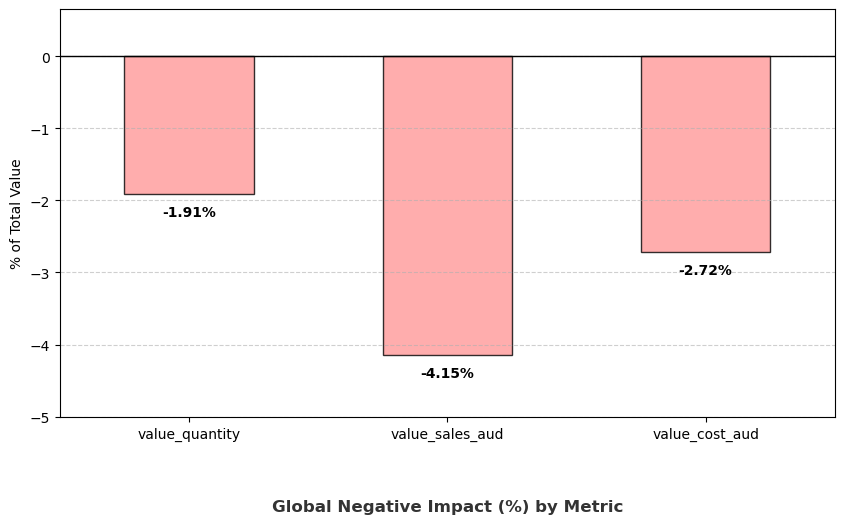


=== Significant Negative Contributors by Company ===

value_quantity
company_code
205   -735936.0
100   -342351.0
220   -222360.0
101   -217047.0
950    -79599.0
Name: value_quantity, dtype: float64

value_sales_aud
company_code
101   -2.360960e+07
205   -1.481581e+07
220   -4.741768e+06
950   -3.555267e+06
100   -3.411417e+06
Name: value_sales_aud, dtype: float64

value_cost_aud
company_code
205   -5.901161e+06
101   -4.151767e+06
950   -8.430124e+05
100   -3.653350e+05
220   -2.223600e+05
Name: value_cost_aud, dtype: float64


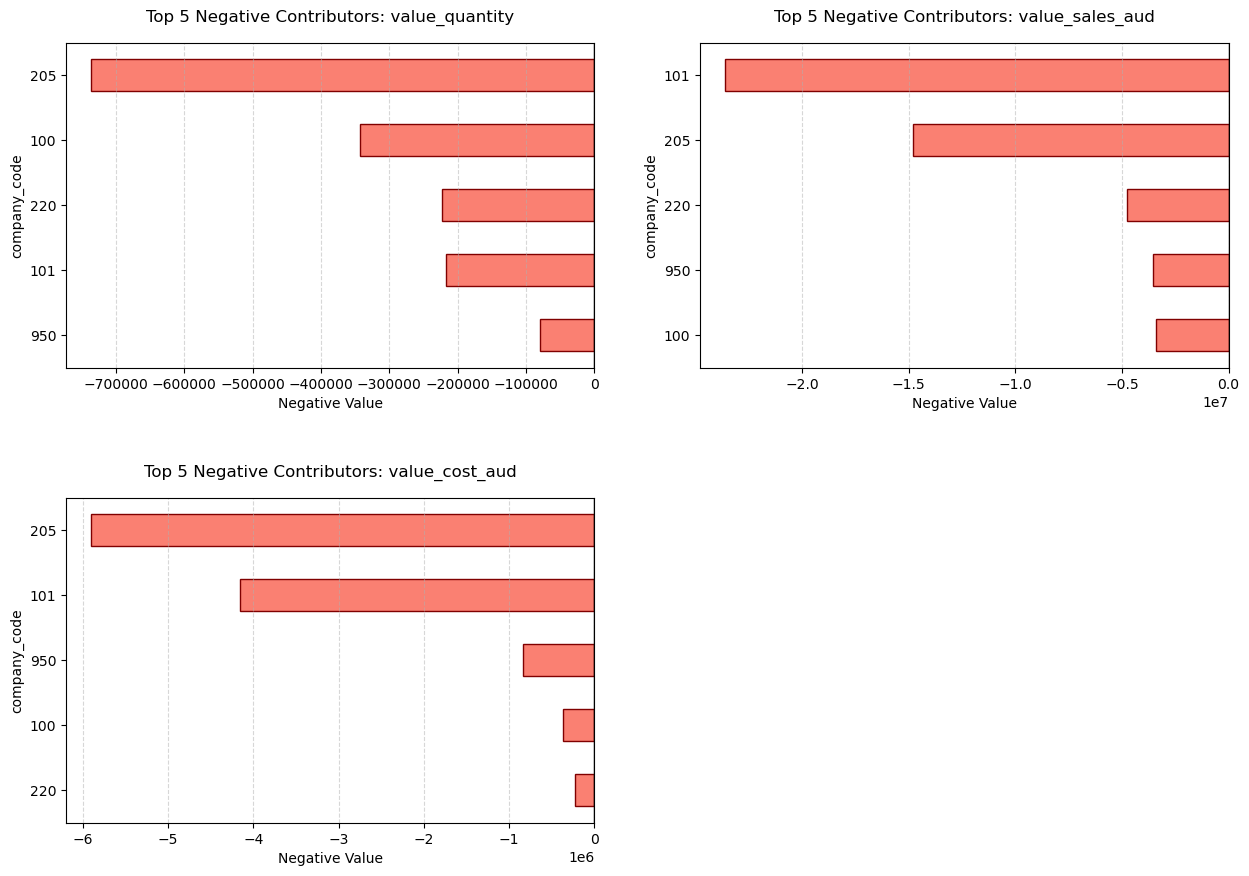

In [26]:
def analyze_negative_values(df, numeric_cols, group_col='company_code'):
    """
    Analyse negative values in key numeric columns.

    This function:
    1. Produces a global summary of negative values for each numeric column:
       - Count of negative records
       - Total negative value (sum of all negative entries)
       - Overall total value
       - Percentage of total value that is negative
    2. Visualises the percentage negative impact for each metric.
    3. For each metric, shows which companies contribute most to the negative values.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Input dataset after cleaning / currency conversion.
    numeric_cols : list of str
        List of numeric columns to check for negative values 
        (e.g. ['value_quantity', 'value_sales_aud', 'value_cost_aud']).
    group_col : str, default 'company_code'
        Column used to group negative values for the breakdown (e.g. company).
    """
    print("Starting negative value analysis...\n")

    # 1. Global summary: all numeric columns at once (vectorised)
    summary = pd.DataFrame(index=numeric_cols)
    summary['Negative Count'] = (df[numeric_cols] < 0).sum()
    
    # Total of negative values only (clip upper=0 keeps negatives, sets positives to 0)
    summary['Total Negative Value'] = df[numeric_cols].clip(upper=0).sum()
    
    # Overall sum of each metric (positive + negative)
    summary['Overall Total'] = df[numeric_cols].sum()
    
    # Percentage of total that is negative
    summary['% Negative Impact'] = (
        summary['Total Negative Value'] / summary['Overall Total'] * 100
    ).fillna(0)

    print("=== Global Negative Value Summary ===")
    display_summary = summary.copy()
    display_summary['Total Negative Value'] = display_summary['Total Negative Value'].map('{:,.2f}'.format)
    display_summary['Overall Total'] = display_summary['Overall Total'].map('{:,.2f}'.format)
    display_summary['% Negative Impact'] = display_summary['% Negative Impact'].map('{:.2f}%'.format)
    print(display_summary)

    # 2. Visualisation: bar chart of % negative impact for each metric
    plt.figure(figsize=(10, 6))
    # Add extra bottom margin so the title can sit below the plot
    plt.subplots_adjust(bottom=0.2)

    # Colour bars red if negative impact, blue otherwise (usually they will be negative)
    colors = ['#ff9999' if x < 0 else '#66b3ff' for x in summary['% Negative Impact']]
    ax = summary['% Negative Impact'].plot(
        kind='bar',
        color=colors,
        alpha=0.8,
        edgecolor='black'
    )

    # Title is placed under the x-axis (y = -0.25) to keep chart body clean
    plt.title(
        'Global Negative Impact (%) by Metric',
        y=-0.25,
        fontsize=12,
        fontweight='bold',
        color='#333333'
    )
    plt.ylabel('% of Total Value')
    plt.axhline(0, color='black', linewidth=1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(rotation=0)

    # Expand y-limits to make room for labels above/below bars
    y_min, y_max = ax.get_ylim()
    padding = (y_max - y_min) * 0.15
    ax.set_ylim(y_min - padding, y_max + padding)

    # Add data labels to each bar (above for positive/zero, below for negative)
    for p in ax.patches:
        height = p.get_height()
        if height >= 0:
            offset = (0, 8)
            va = 'bottom'
        else:
            offset = (0, -8)
            va = 'top'

        ax.annotate(
            f'{height:.2f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va=va,
            xytext=offset,
            textcoords='offset points',
            fontsize=10,
            fontweight='bold'
        )

    plt.show()

    # 3. Detailed breakdown: which companies are causing the negative values
    print("\n=== Significant Negative Contributors by Company ===")

    num_plots = len(numeric_cols)
    rows = (num_plots + 1) // 2  # two plots per row
    fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
    plt.subplots_adjust(hspace=0.4, bottom=0.1)
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        # If there are no negative values for this metric, note it and skip
        if summary.loc[col, 'Negative Count'] == 0:
            axes[i].text(0.5, 0.5, "No Negative Values", ha='center', va='center')
            axes[i].set_axis_off()
            continue

        print(f"\n{col}")
        # Filter rows where this metric is negative and keep only group + metric
        negative_rows = df.loc[df[col] < 0, [group_col, col]]
        neg_by_group = negative_rows.groupby(group_col)[col].sum().sort_values()

        # Top 5 negative contributors (most negative values)
        top_5 = neg_by_group.head(5)
        print(top_5)

        # Plot as horizontal bar chart (largest magnitude at the top)
        plot_data = top_5.sort_values(ascending=False)
        ax_sub = axes[i]
        plot_data.plot(
            kind='barh',
            ax=ax_sub,
            color='salmon',
            edgecolor='maroon'
        )

        ax_sub.set_title(f"Top 5 Negative Contributors: {col}", pad=15)
        ax_sub.set_xlabel("Negative Value")
        ax_sub.axvline(0, color='black', linewidth=1)
        ax_sub.grid(axis='x', linestyle='--', alpha=0.5)

    # Turn off any unused subplots (if numeric_cols is odd length)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.show()



numeric_cols = ['value_quantity', 'value_sales_aud', 'value_cost_aud']
analyze_negative_values(df_final, numeric_cols)


We analyzed `value_quantity`,  `value_sales_aud`, and `value_cost_aud` to identify financial risks associated with returns, reversals, and credit notes.

### 1. Revenue Erosion is Disproportionate to Cost Recovery
* **The Issue:** `value_sales_aud` shows a significant **4.15% negative impact** (-$51.4M), whereas `value_cost_aud` only reflects a **2.72% reversal** (-$11.5M).
* **The Implication:** This discrepancy suggests a high volume of **"Credit Only"** transactions where revenue is refunded, but the Cost of Goods Sold (COGS) is not equally reversed (or the goods were not returned to inventory). This creates a "double hit" on Gross Margin that will skew profitability analysis if not segmented.

### 2. Company-Specific Anomalies
The negative values are not randomly distributed; they are highly concentrated in specific entities, suggesting different operational behaviors:
* **Company 101 (The Financial Leak):** This entity is the largest driver of negative sales (**-$23.6M**), yet it ranks lower on physical quantity reversals compared to Company 205. This indicates Company 101 is likely processing high-value financial credits or price corrections rather than handling physical bulk returns.
* **Company 205 (The Operational Churn):** This entity dominates negative *quantity* (**-736k units**). This suggests Company 205 acts as a central returns hub or is experiencing a high volume of physical stock rejections/returns compared to other business units.

To prevent these negative values from distorting the view of sales performance:
1.  **Segregation:** Do not simply sum these columns. Create a flag for `Is_Return` (where Value < 0) to analyze **Gross Sales** vs. **Net Sales** separately.
2.  **Margin Check:** Deep dive into Company 101 to understand why $23M in sales was reversed without a proportional cost reversal.

# Handling Outliner

In [27]:
# Check the skewness of the original (pre-transformation) numeric variables
print("ORIGINAL SKEWNESS")

# Columns we want to assess for skewness
original_cols = ['value_quantity', 'value_sales_aud', 'value_cost_aud']

# Calculate skewness for each column:
# .skew()   → computes the sample skewness for each numeric column
# .sort_values(ascending=False) → sorts from most positively skewed to least
skewness_original = df_final[original_cols].skew().sort_values(ascending=False)

# Print the skewness values so we can see how asymmetric each distribution is
print(skewness_original)


ORIGINAL SKEWNESS
value_quantity     97.957755
value_cost_aud     43.753462
value_sales_aud    23.375112
dtype: float64



### 1. Extreme Skewness in Quantity (`97.96`)
* **Observation:** The `value_quantity` column exhibits an **extreme positive skew** of ~98. This is astronomically high and indicates that the data is not just "non-normal" but is dominated by a few massive outlier events.
* **Implication:** The "average" (mean) quantity will be completely useless as a metric because it is being pulled upward by these massive bulk orders.
* **Business Context:** This likely reflects the wholesale nature of the business—most lines are for small amounts (e.g., 1-10 units), but there are occasional bulk orders for thousands of units (e.g., fitting out a stadium or skyscraper).

### 2. The "Whale" Effect in Financials (`43.75` & `23.38`)
* **Observation:** Both `value_cost_aud` (43.8) and `value_sales_aud` (23.4) are heavily right-skewed.
* **Implication:** This confirms a **Pareto Principle (80/20 rule)** dynamic where a small fraction of high-value transactions account for the majority of the revenue.
* **Risk:** Any predictive modeling (like forecasting sales) that assumes a normal distribution will fail. The model will significantly under-predict the "whale" clients and over-predict the small "long tail" clients.


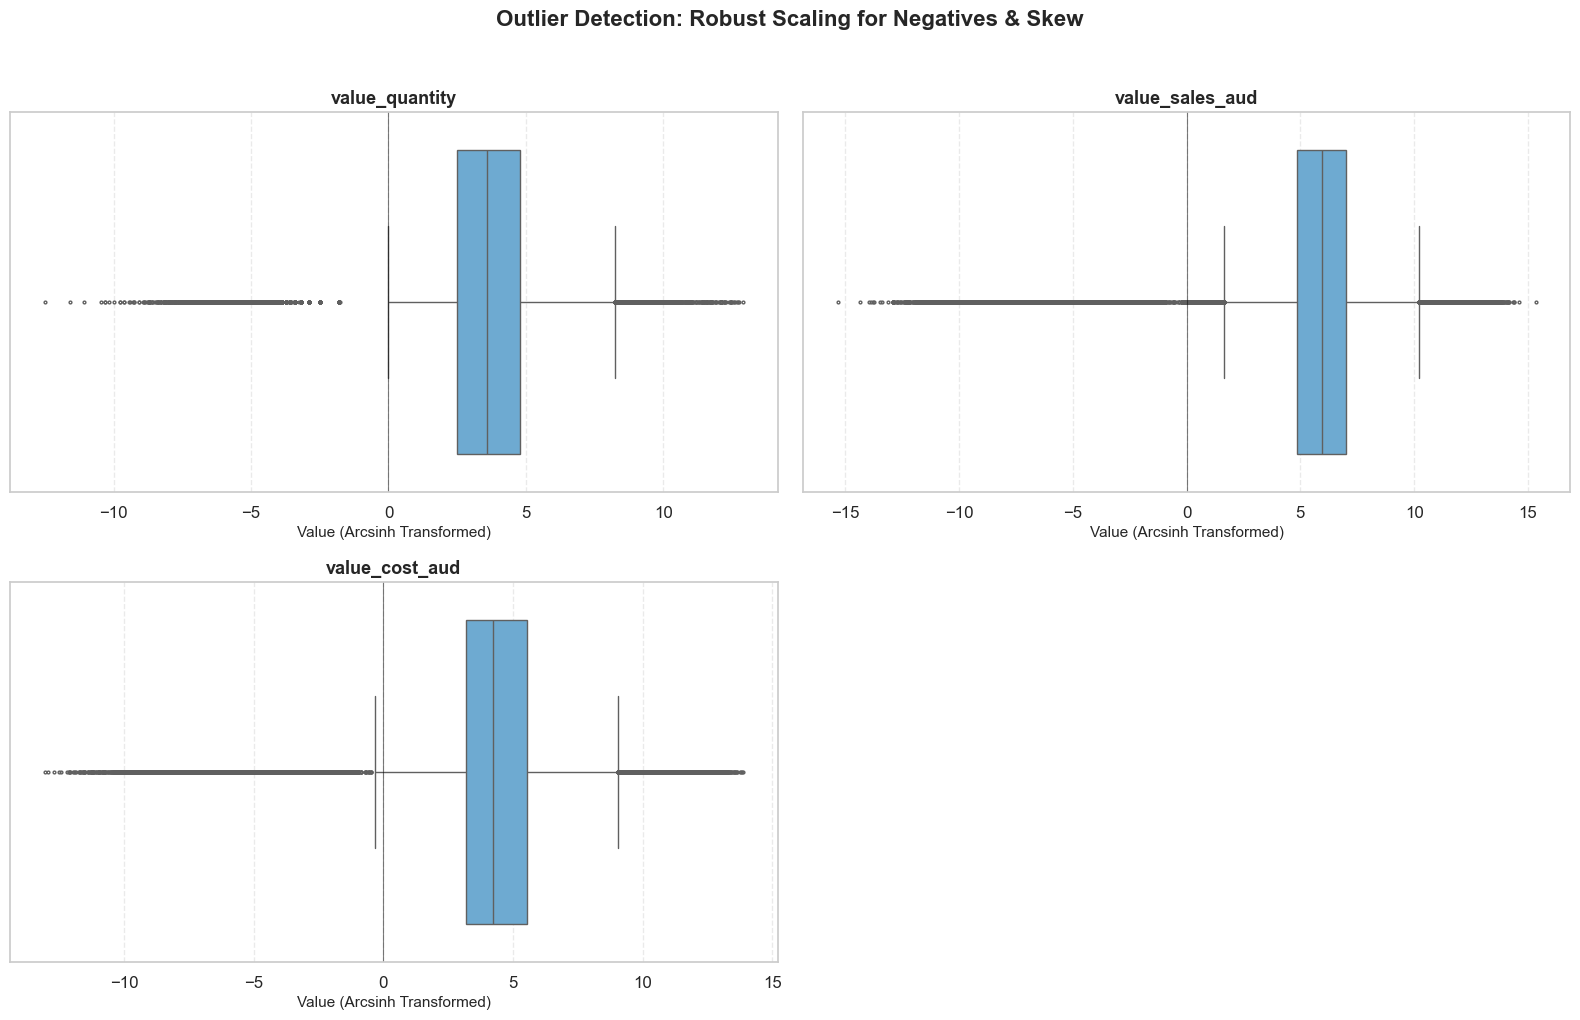

In [28]:
# Select numeric variables and remove any missing values
original_cols = ['value_quantity', 'value_sales_aud', 'value_cost_aud']
df_box = df_final[original_cols].dropna()

# Set a clean visual style for consistent and readable plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(16, 10))

for i, col in enumerate(original_cols, 1):
    plt.subplot(2, 2, i)

    # Apply arcsinh transformation:
    # - Handles negative values safely (unlike log)
    # - Stabilises extreme positive outliers
    # - Makes the distribution more symmetric for Boxplot readability
    data_transformed = np.arcsinh(df_box[col])

    # Draw a boxplot of the transformed data
    sns.boxplot(
        x=data_transformed,
        color='#5DADE2',        # Light blue for visibility
        linewidth=1,
        fliersize=2             # Small dots for outliers
    )

    # Title and axis labels
    plt.title(f'{col}', fontsize=13, fontweight='bold')
    plt.xlabel('Value (Arcsinh Transformed)', fontsize=11)

    # Add a vertical reference line at zero
    # This visually separates returns (negative) from sales (positive)
    plt.axvline(
        0,
        color='black',
        linestyle='-',
        linewidth=0.8,
        alpha=0.5
    )

    # Light grid on the x-axis for easier interpretation
    plt.grid(axis='x', linestyle='--', alpha=0.4)

# Main title and layout adjustments
plt.suptitle(
    'Outlier Detection: Robust Scaling for Negatives & Skew',
    fontsize=16,
    fontweight='bold',
    y=1.02
)
plt.tight_layout()
plt.show()



1.  **The "Whale" Economy:**
    * **`value_quantity`** and **`value_sales_aud`** show a very tight "Box" (IQR) but massive distinct outliers to the right.
    * **Implication:** The "typical" daily transaction is small (likely maintenance or replacement parts), but the business revenue is driven by a small number of massive project-based orders (the outliers).
    * **Risk:** Forecasting using a simple "Average Order Value" will be dangerous. It will over-estimate the daily "run rate" and under-estimate the impact of missing a single big project.

2.  **Symmetry of Returns:**
    * We see significant outlier activity on the **negative side** (left of 0) for Sales and Costs.
    * **Implication:** Returns are not just small adjustments. There are "Whale Returns"—likely entire project cancellations or bulk stock-backs—that mirror the magnitude of the large sales.

* **Segmentation is Mandatory:** We cannot treat "Outliers" and "Normal Data" the same.
* **Action:** Create a flag in the dataset:
    * `Segment = 'Whale'` (Top 1% of transactions)
    * `Segment = 'Standard'` (The rest)
* Analyze profitability separately for these two groups, as "Whales" likely have lower margins (bulk pricing) but higher absolute profit.

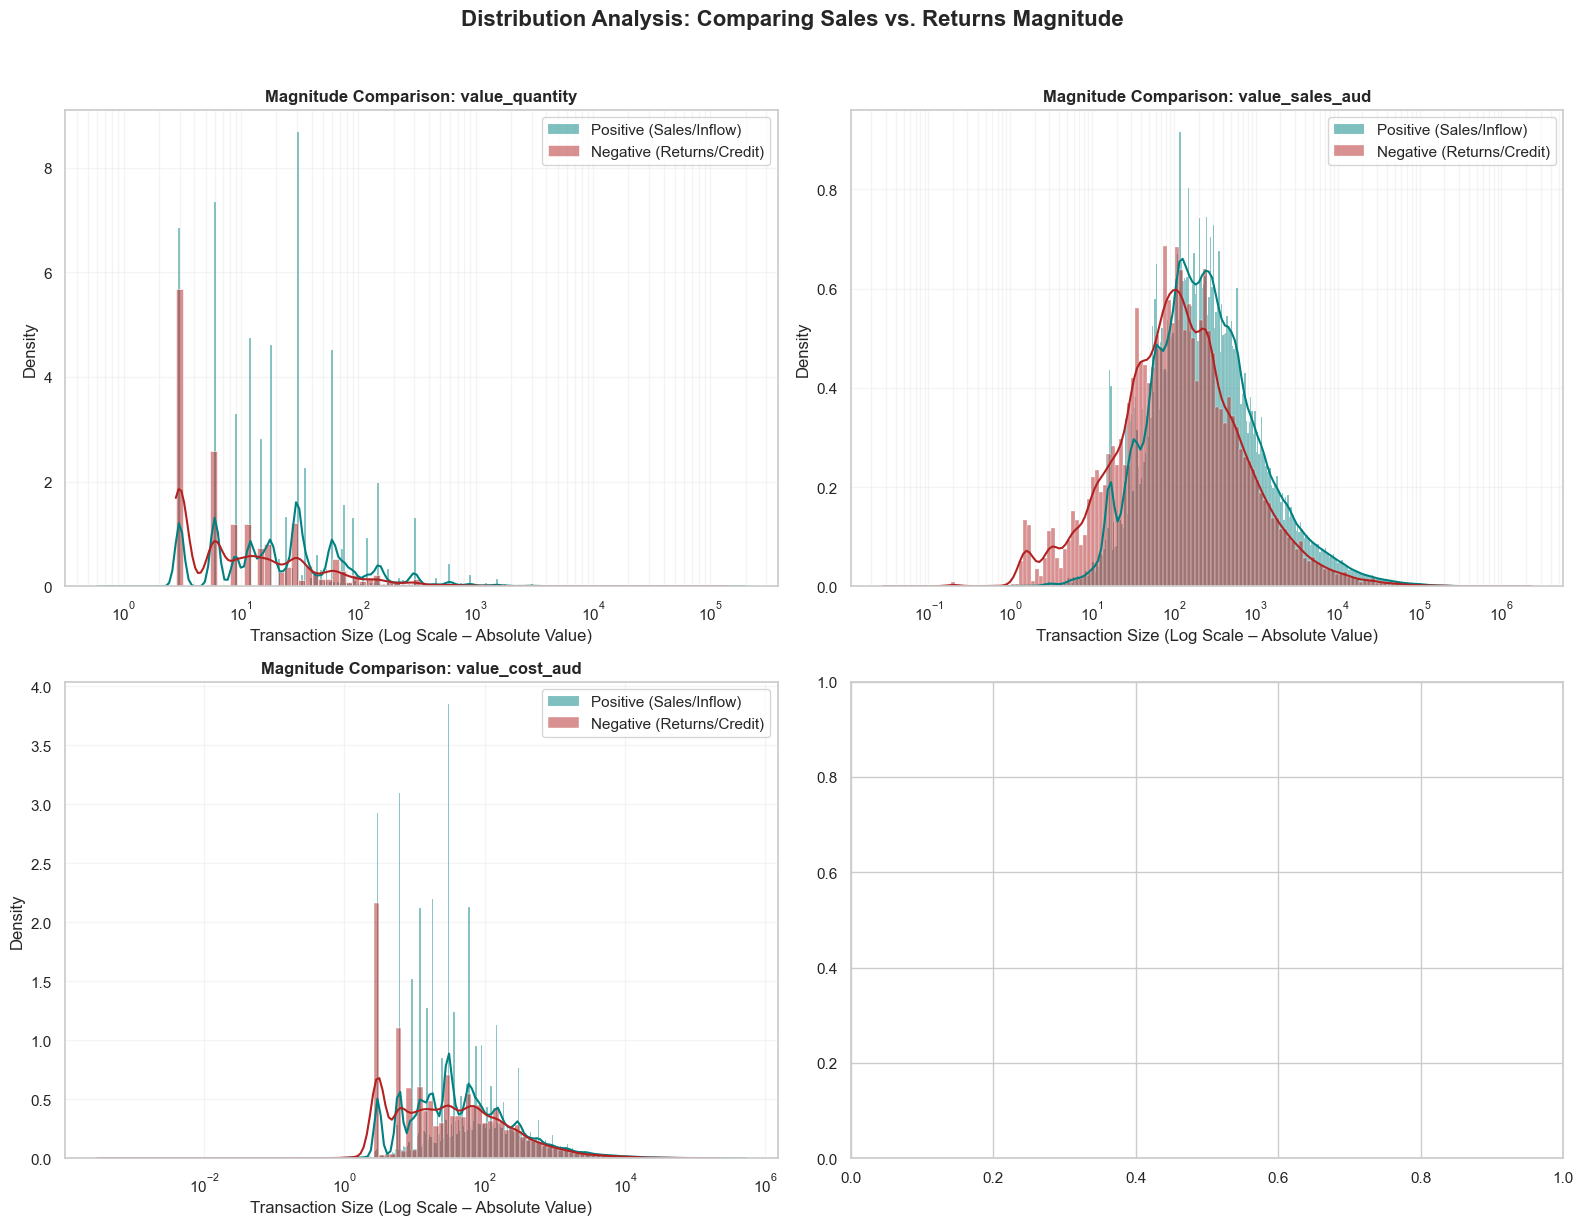

In [29]:
# 1. Select the numerical columns to analyse
cols = ['value_quantity', 'value_sales_aud', 'value_cost_aud']

# 2. Configure plot style and layout
sns.set(style="whitegrid", palette="muted")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]

    # 3. Split into positive and negative values
    # Positive values represent sales (inflows)
    # Negative values represent returns or credits (outflows)
    pos_data = df_final[df_final[col] > 0][col]
    
    # Convert negative values to positive magnitude for comparison
    neg_data = df_final[df_final[col] < 0][col].abs()

    # 4. Plot two overlaid histograms on a log scale
    # Teal = Sales / inflow amounts
    sns.histplot(
        pos_data,
        color='teal',
        label='Positive (Sales/Inflow)',
        kde=True,
        stat='density',
        alpha=0.5,
        log_scale=True,
        ax=ax
    )

    # Red = Returns / credit amounts (absolute value)
    sns.histplot(
        neg_data,
        color='firebrick',
        label='Negative (Returns/Credit)',
        kde=True,
        stat='density',
        alpha=0.5,
        log_scale=True,
        ax=ax
    )

    # 5. Axis labels, title, legend, and gridlines
    ax.set_title(f'Magnitude Comparison: {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Transaction Size (Log Scale – Absolute Value)')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, which="both", ls="-", alpha=0.2)

# Main figure title and spacing
plt.suptitle(
    'Distribution Analysis: Comparing Sales vs. Returns Magnitude',
    fontsize=16,
    fontweight='bold',
    y=1.02
)
plt.tight_layout()
plt.show()



We separated transactions into **Inflows (Blue/Positive)** and **Outflows (Red/Negative)** and plotted them on a Scale to compare their magnitude. The goal was to test if returns are typically small "nuisance" items or if they mirror the size of our largest sales.

### 1. The "Whale Return" Risk (Symmetry)
* **Observation:** For `value_quantity` and `value_sales_aud`, the Red distribution (Returns) almost perfectly mirrors the Blue distribution (Sales). They span the same width on the x-axis.
* **Critical Insight:** Returns are not limited to small, low-value items. We have **"Whale Returns"**—instances where massive bulk orders (likely Project Orders) are being returned or credited in full.
* **Business Risk:** The risk profile scales linearly with revenue. A "Big Win" sale carries an equally "Big Risk" of a massive reversal that could wipe out a month's profitability.

### 2. Operational Disconnect in Quantity
* **Observation:** In `value_quantity`, the Red curve is slightly shifted compared to Sales.
* **Insight:** While we credit high *dollar* values frequently (seen in Sales), we physically return *goods* less frequently.
* **Hypothesis:** This confirms the presence of **"Price-Only Credits"** (Order Type `CRD`), where we refund a customer for a dispute or discount without physically moving stock back to the warehouse. This saves logistics costs but bleeds revenue.

### Strategic Recommendation
* **Policy Change:** For orders falling into the top 10% of magnitude (the far right of the Blue curve), implement stricter **"No Return / Restocking Fee"** policies. The data shows these large orders are the primary driver of volatility.
*  Model **Gross Sales** and **Return Rate** separately, as they appear to be driven by different distinct behaviors (Project cancellations vs. Defective products).

In [30]:

# 1. APPLY TRANSFORMATIONS
print(" Starting Feature Transformation")

# A. Transform the Continuous Variables (Squash the "Whales")
cols_to_transform = ['value_quantity', 'value_cost_aud', 'value_sales_aud']

for col in cols_to_transform:
    # np.arcsinh is the "Safe Log" that handles negatives (Returns) and Zeros
    df_final[f'{col}_transformed'] = np.arcsinh(df_final[col])
    print(f"    Created '{col}_transformed'")

 Starting Feature Transformation
    Created 'value_quantity_transformed'
    Created 'value_cost_aud_transformed'
    Created 'value_sales_aud_transformed'


=== FINAL SKEWNESS REPORT ===
value_quantity_transformed    -1.302153
value_cost_aud_transformed    -1.230007
value_sales_aud_transformed   -2.351572
dtype: float64
------------------------------


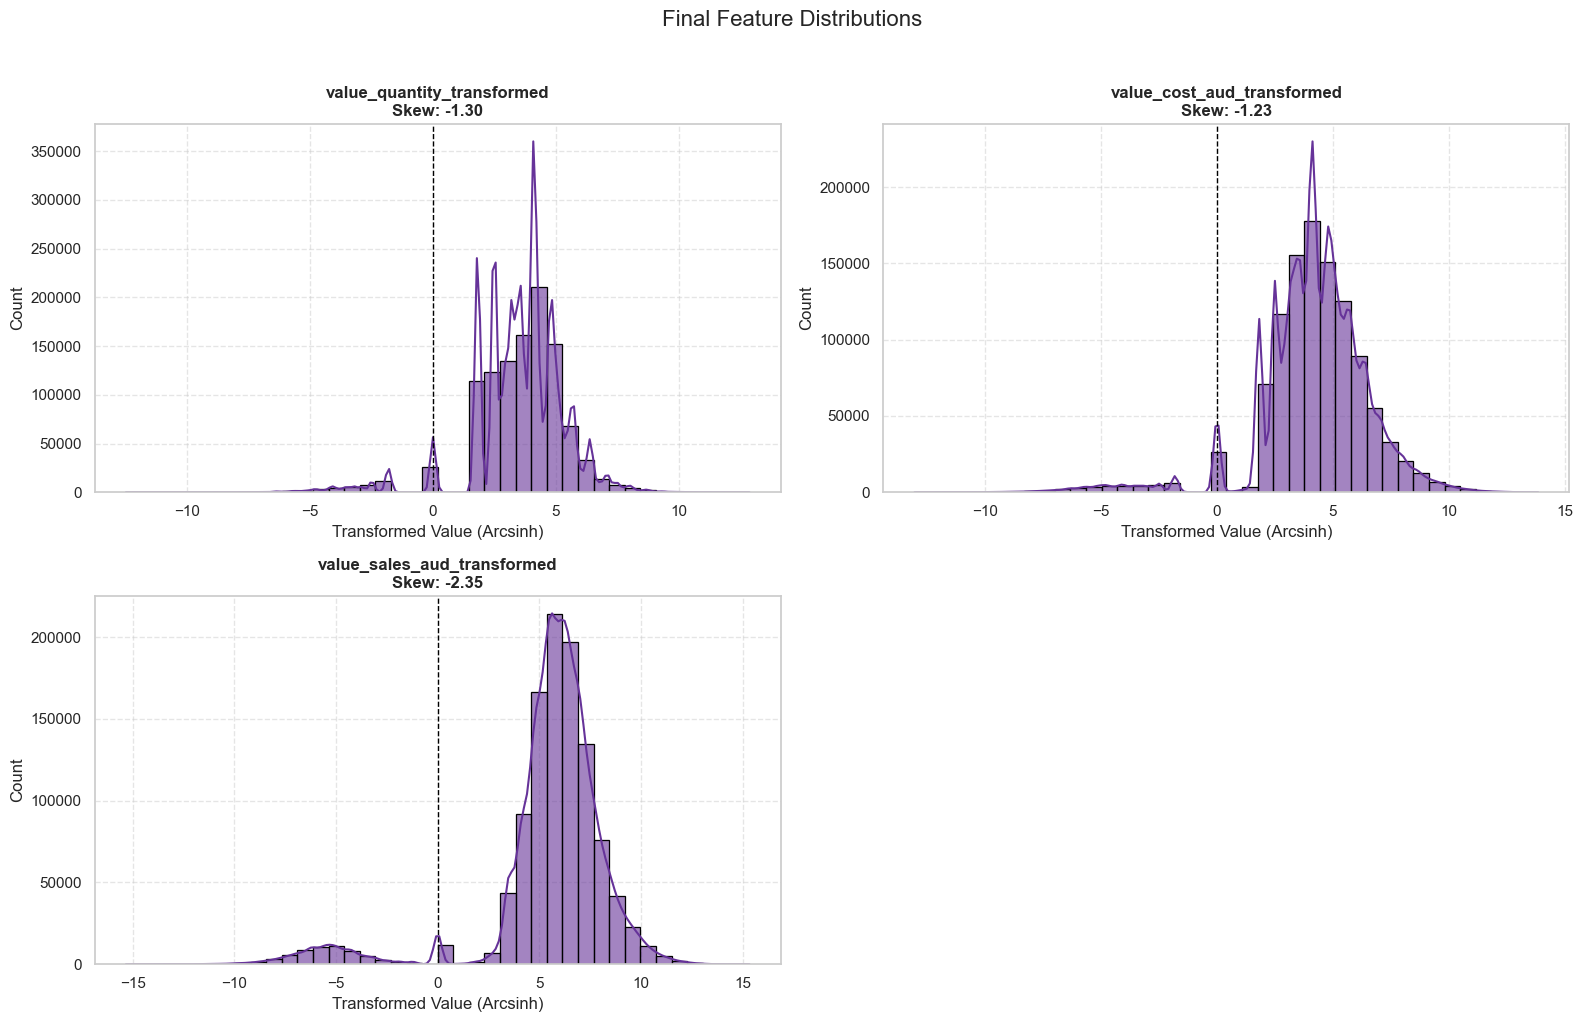

In [31]:

# 1. Select ALL Transformed Columns 
final_cols = [
    'value_quantity_transformed',
    'value_cost_aud_transformed',
    'value_sales_aud_transformed',
]

# Safety check: only plot columns that actually exist
plot_cols = [c for c in final_cols if c in df_final.columns]

# 2. Print Exact Skewness Values
print("=== FINAL SKEWNESS REPORT ===")
print(df_final[plot_cols].skew())
print("-" * 30)

# 3. Visualize the New Distributions
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid", context="notebook")

for i, col in enumerate(plot_cols, 1):
    plt.subplot(2, 2, i) # 
    
    # Plot Histogram with KDE
    sns.histplot(df_final[col], kde=True, color='rebeccapurple', 
                 edgecolor='black', alpha=0.6, bins=40)
    
    # Dynamic Title with Skewness
    skew_val = df_final[col].skew()
    plt.title(f'{col}\nSkew: {skew_val:.2f}', fontsize=12, fontweight='bold')
    plt.xlabel('Transformed Value (Arcsinh)')
    
    # Add a zero line to show the center
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    
    # Add grid for readability
    plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Final Feature Distributions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**1. Strategy: Preservation of High-Value Signals**
We observed that the raw dataset was heavily right-skewed (Skewness > 20) due to "Whale" transactions (VIP customers and bulk projects).
* **Decision:** Standard outlier removal (clipping/trimming) was **rejected**.
* These extreme values are the primary drivers of revenue volatility, not data errors. Removing them would artificially restrict the model's ability to predict high-impact business events, biasing predictions toward low-value averages.

**2. Methodology: Handling Information Density**
The **Arcsinh (Inverse Hyperbolic Sine)** transformation was selected to manage this skewness without data loss. By compressing the range of values logarithmically:
* **Rank is Preserved:** The model maintains the distinction that "Transaction A > Transaction B."
* **Magnitude is Managed:** The astronomical gap between standard orders and project orders is reduced to a linear scale, preventing gradient explosions during model training.

**3. Results: The "Return" Effect (Left Skew)**
Post-transformation, the distributions shifted from extreme positive skew to **negative skew (-1.23 to -2.35)**.
*  This "over-correction" confirms that once the massive sales outliers are mathematically compressed, the **Returns & Refunds** (negative values) become the dominant tail in the distribution.
While not perfectly normal, the feature space is now stable and bounded. This distribution is highly effective for Tree-based models (e.g., XGBoost, Random Forest) which are robust to the remaining left-skew.

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087121 entries, 0 to 1087120
Data columns (total 39 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   accounting_date              1087121 non-null  datetime64[ns]
 1   company_code                 1087121 non-null  object        
 2   customer_code                1087121 non-null  object        
 3   customer_district_code       1087121 non-null  object        
 4   item_code                    1087121 non-null  object        
 5   business_area_code           1087121 non-null  object        
 6   item_group_code              1087121 non-null  object        
 7   item_class_code              1087121 non-null  object        
 8   item_type                    1087121 non-null  object        
 9   bonus_group_code             1087121 non-null  object        
 10  environment_group_code       1087121 non-null  object        
 11  technology_

In [33]:
# Save to CSV
df_final.to_csv('dataset_cleaned.csv', index=False)

print("File saved successfully as dataset_cleaned.csv")

File saved successfully as dataset_cleaned.csv
